In [1]:
from essentia.standard import *

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import csv

from scipy import interpolate

[   INFO   ] MusicExtractorSVM: no classifier models were configured by default


In [2]:
# we start by instantiating the audio loader:
loader = MonoLoader(filename='audios/par1_trim.mp3')

# and then we actually perform the loading:
audio = loader()

len(audio)

2315520

In [3]:
# read rhythm onsets (chocalho) marks (in frames)
with open("par1_rhythm_frames.txt") as file_name:
    onsets_chocalho = np.loadtxt(file_name, delimiter="\t")

In [4]:
# interp(x,x_points,y_points) -> y | y = f(x)
def interp(x,x_points,y_points):
    tck = interpolate.splrep(x_points,y_points)
    return interpolate.splev(x, tck)

In [5]:
def resample(audio, choc):
    n = len(choc)
    new_sample = list()
    
    rate = 100
    
    for i in range(n-2):
    
        inicio = int(choc[i])
        fim = int(choc[i+1])
        step = (fim-inicio)/rate

        yp = audio[inicio:fim]
        xp = np.array(range(inicio,fim))
        
        #cria lista para ser interpolada
        xi = np.arange(inicio,fim,step)
        
        #itera nos 100 pontos novos de cada segmento
        new_sample.append(interp(xi, xp, yp))
        
    return new_sample

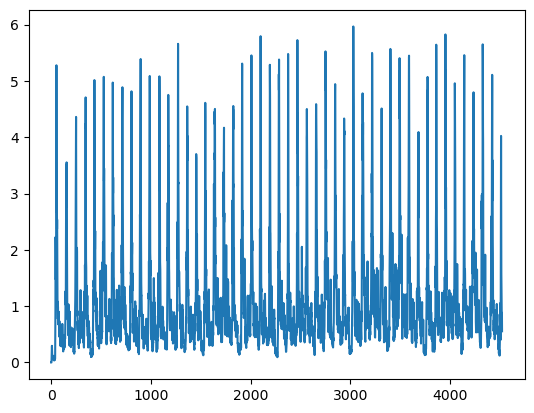

In [6]:
# The OnsetDetection algorithm provides various ODFs.
# we chose Complex-Domain spectral difference function 
od_complex = OnsetDetection(method='complex')

# We need the auxilary algorithms to compute magnitude and phase.
w = Windowing(type='hann')
fft = FFT() # Outputs a complex FFT vector.
c2p = CartesianToPolar() # Converts it into a pair of magnitude and phase vectors.

# Compute ODF frame by frame. Store results to a Pool.
pool = essentia.Pool()
for frame in FrameGenerator(np.array(audio), frameSize=1024, hopSize=512):
    magnitude, phase = c2p(fft(w(frame)))
    pool.add('odf.complex', od_complex(magnitude, phase))
#print(pool['odf.complex'])

# 2. Detect onset locations.
onsets = Onsets()

onsets_complex = onsets(essentia.array([pool['odf.complex']]), [1])

plt.plot(pool['odf.complex'])

In [7]:
odf_complex = resample(pool['odf.complex'],np.round(onsets_chocalho/512))

len(odf_complex)

47

In [44]:
comp1 = [1,2,5,6,17,18,21,22,33,34,37,38]
comp2 = [3,4,11,12,19,20,27,28,35,36]
comp3 = [7,8,23,24,39,40]
comp4 = [9,10,13,14,25,26,29,30,41,42]
comp5 = [15,16,31,32,43,44,45,46]

colors = ['blue','orange','green','red','purple','brown','magenta','yellow','cyan','lime','lightcoral','pink','navy','teal']

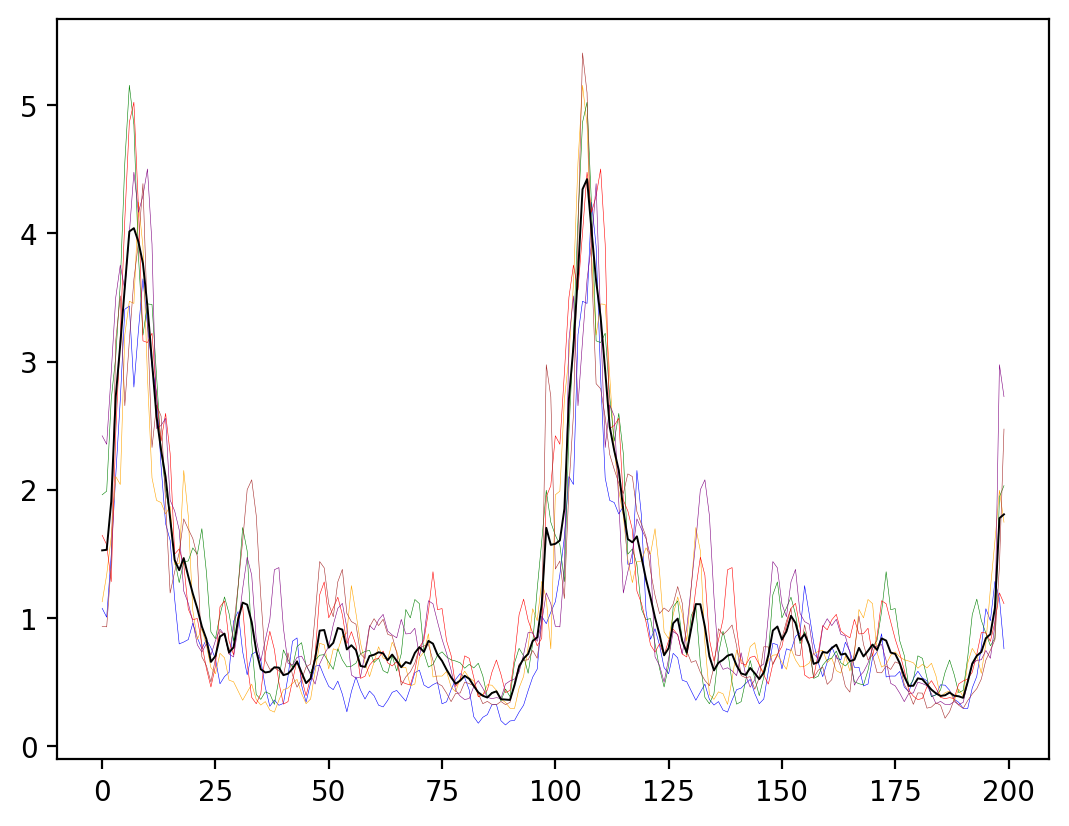

In [57]:
y=np.arange(200)
plt.figure(dpi=200)
l=0.2

plot = []

comp = comp1
len_comp = len(comp)
j = 0

for i in range(len_comp//2):
    plot.append([])
    plot[i].extend(odf_complex[comp[j]])
    plot[i].extend(odf_complex[comp[j+1]])
    j += 1
    plt.plot(y,plot[i],color=colors[i], linewidth=l)
sample = []
for i in range(len(plot)):
    sample.append(plot[i])
plt.plot(y,np.mean(sample,axis=0),color='black',linewidth=0.7)

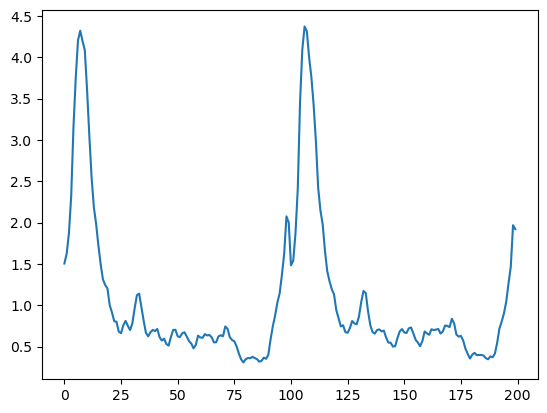

In [43]:
sample = []
for i in range(len(plot)):
    sample.append(plot[i])
plt.plot(y,np.mean(sample,axis=0))

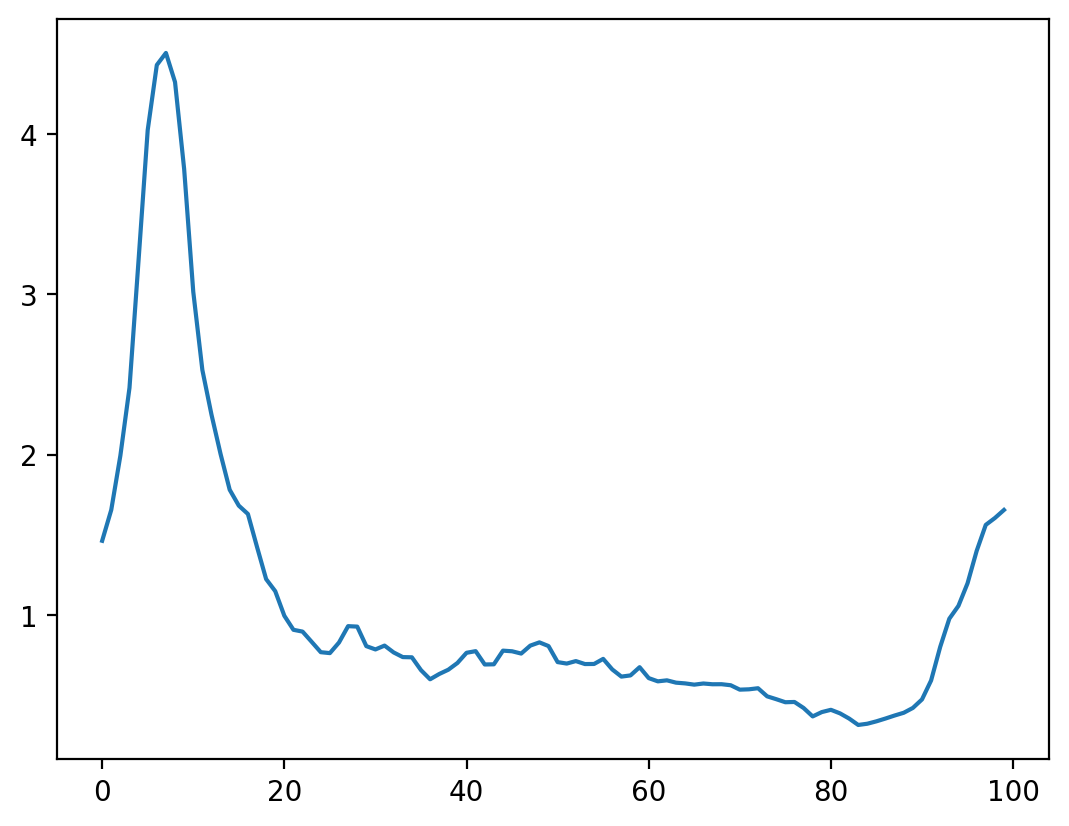

In [12]:
y=np.arange(100)
sample = []
for i in comp2:
    sample.append(odf_complex[i])

#plt.figure(dpi=200)
plt.plot(y,np.mean(sample,axis=0))

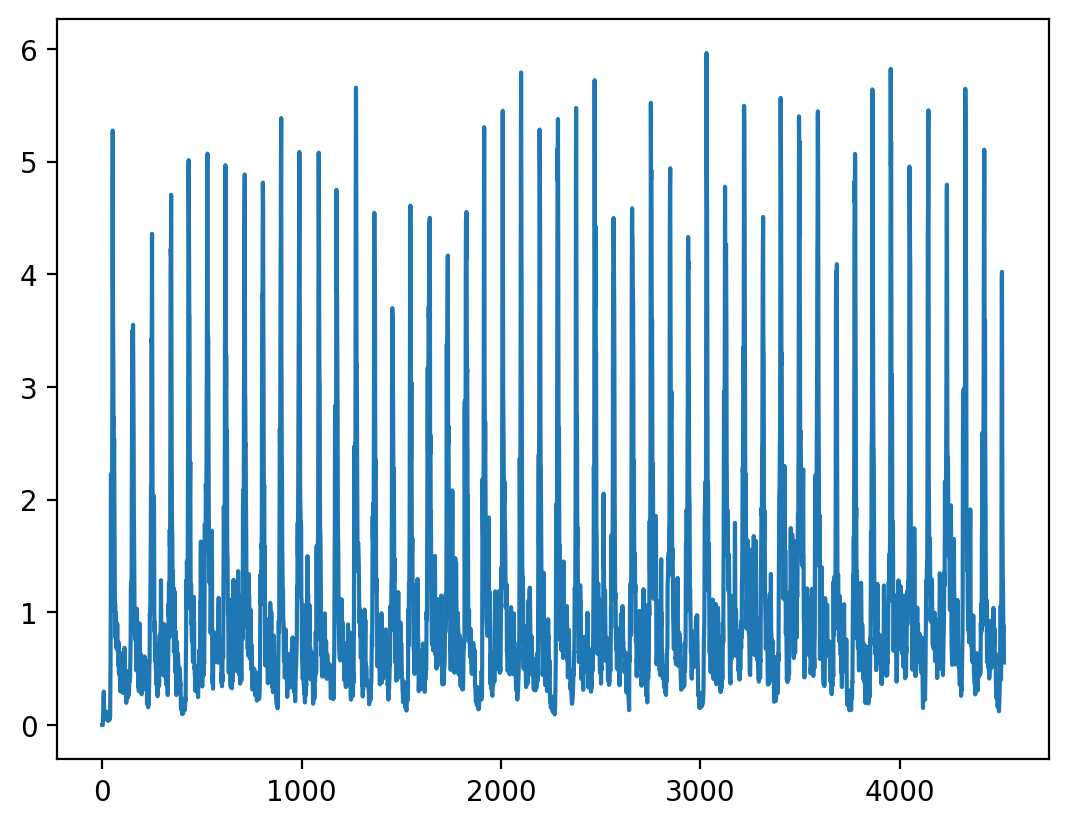

In [13]:
plt.figure(dpi=200)
plt.plot(pool['odf.complex'])

In [14]:
# The OnsetDetection algorithm provides various ODFs.
# we chose Complex-Domain spectral difference function 
od_hfc = OnsetDetection(method='hfc')

# We need the auxilary algorithms to compute magnitude and phase.
w = Windowing(type='hann')
fft = FFT() # Outputs a complex FFT vector.
c2p = CartesianToPolar() # Converts it into a pair of magnitude and phase vectors.

# Compute ODF frame by frame. Store results to a Pool.
pool = essentia.Pool()
for frame in FrameGenerator(np.array(audio), frameSize=1024, hopSize=512):
    magnitude, phase = c2p(fft(w(frame)))
    pool.add('odf.hfc', od_hfc(magnitude, phase))
#print(pool['odf.complex'])

# 2. Detect onset locations.
onsets = Onsets()

onsets_complex = onsets(essentia.array([pool['odf.hfc']]), [1])

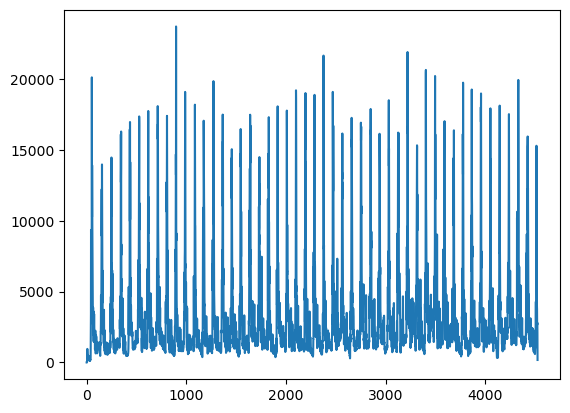

In [15]:
plt.plot(pool['odf.hfc'])
odf_hfc = resample(pool['odf.hfc'],np.round(onsets_chocalho/512))

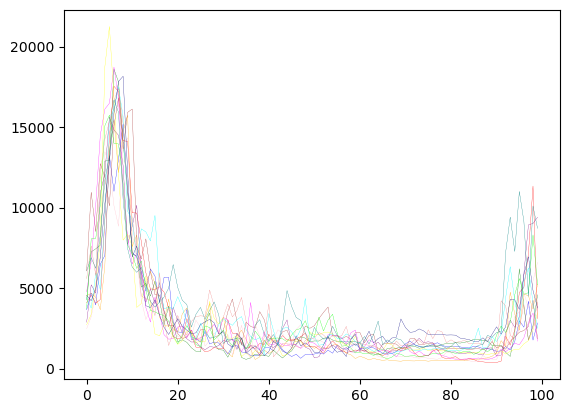

In [16]:
y=np.arange(100)
#plt.figure(dpi=1000)
l=0.2

comp = comp2
len_comp = len(comp)

for i in range(len_comp):
    plt.plot(y,odf_hfc[comp[i]],color=colors[i], linewidth=l)

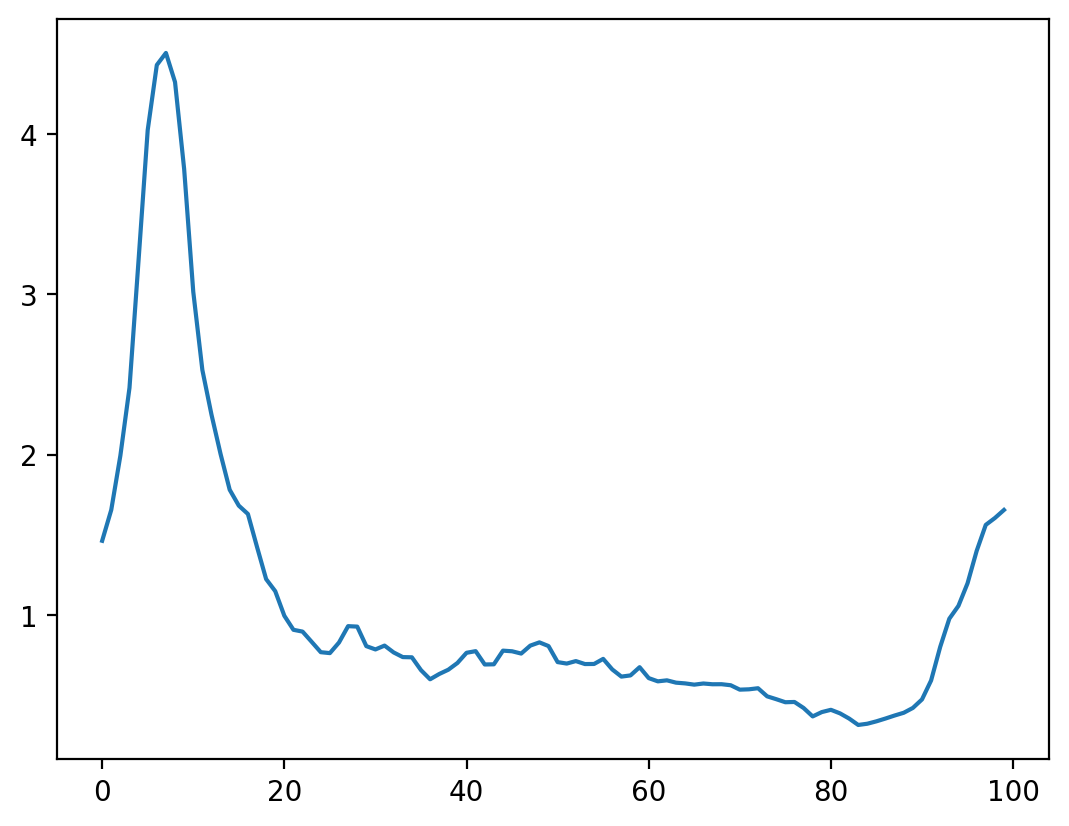

In [17]:
y=np.arange(100)
sample = []
for i in comp2:
    sample.append(odf_complex[i])

plt.figure(dpi=200)
plt.plot(y,np.mean(sample,axis=0))

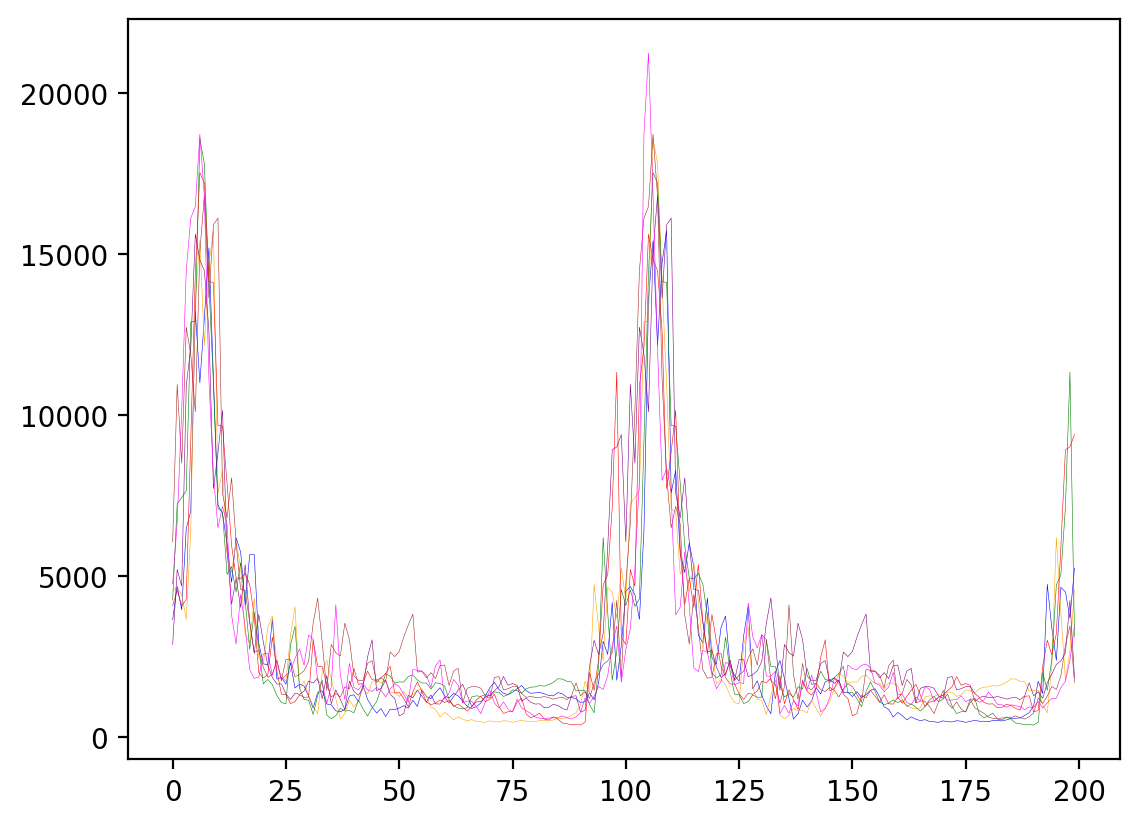

In [18]:
y=np.arange(200)
plt.figure(dpi=200)
l=0.2

plot = []

comp = comp2
len_comp = len(comp)
j = 0

for i in range(len_comp//2):
    plot.append([])
    plot[i].extend(odf_hfc[comp[j]])
    plot[i].extend(odf_hfc[comp[j+1]])
    j += 1
    plt.plot(y,plot[i],color=colors[i], linewidth=l)

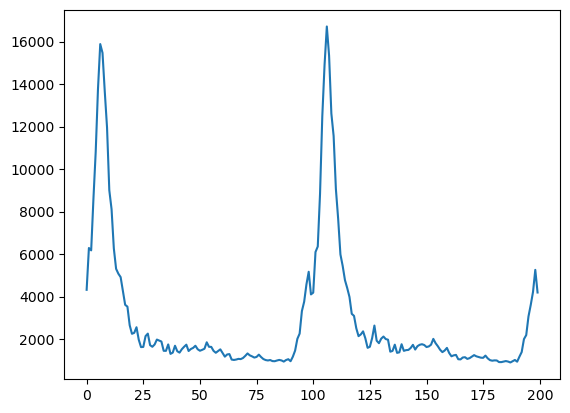

In [19]:
sample = []
for i in range(len(plot)):
    sample.append(plot[i])
plt.plot(y,np.mean(sample,axis=0))

In [20]:
# The OnsetDetection algorithm provides various ODFs.
# we chose Complex-Domain spectral difference function 
od_rms = OnsetDetection(method='rms')

# We need the auxilary algorithms to compute magnitude and phase.
w = Windowing(type='hann')
fft = FFT() # Outputs a complex FFT vector.
c2p = CartesianToPolar() # Converts it into a pair of magnitude and phase vectors.

# Compute ODF frame by frame. Store results to a Pool.
pool = essentia.Pool()
for frame in FrameGenerator(np.array(audio), frameSize=1024, hopSize=512):
    magnitude, phase = c2p(fft(w(frame)))
    pool.add('odf.rms', od_hfc(magnitude, phase))
#print(pool['odf.complex'])

# 2. Detect onset locations.
onsets = Onsets()

onsets_complex = onsets(essentia.array([pool['odf.rms']]), [1])

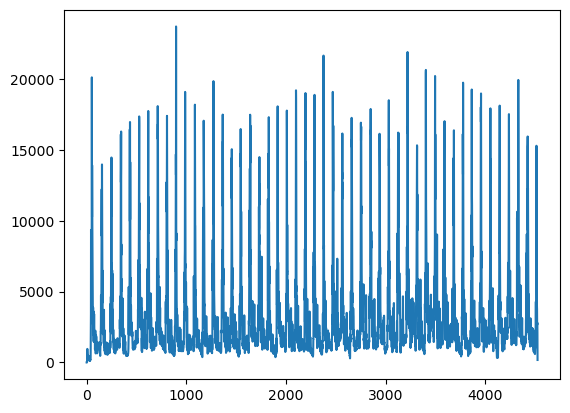

In [21]:
plt.plot(pool['odf.rms'])
odf_rms = resample(pool['odf.rms'],np.round(onsets_chocalho/512))

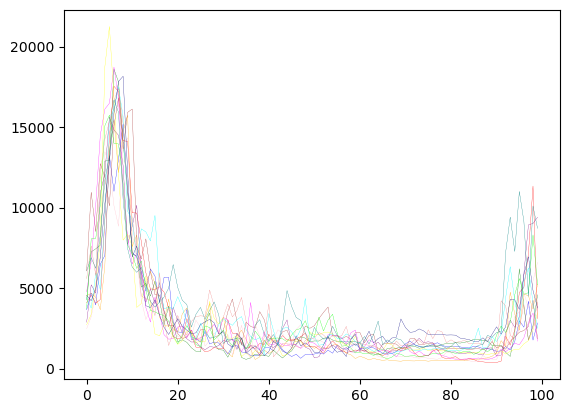

In [22]:
y=np.arange(100)
#plt.figure(dpi=1000)
l=0.2

comp = comp2
len_comp = len(comp)

for i in range(len_comp):
    plt.plot(y,odf_hfc[comp[i]],color=colors[i], linewidth=l)

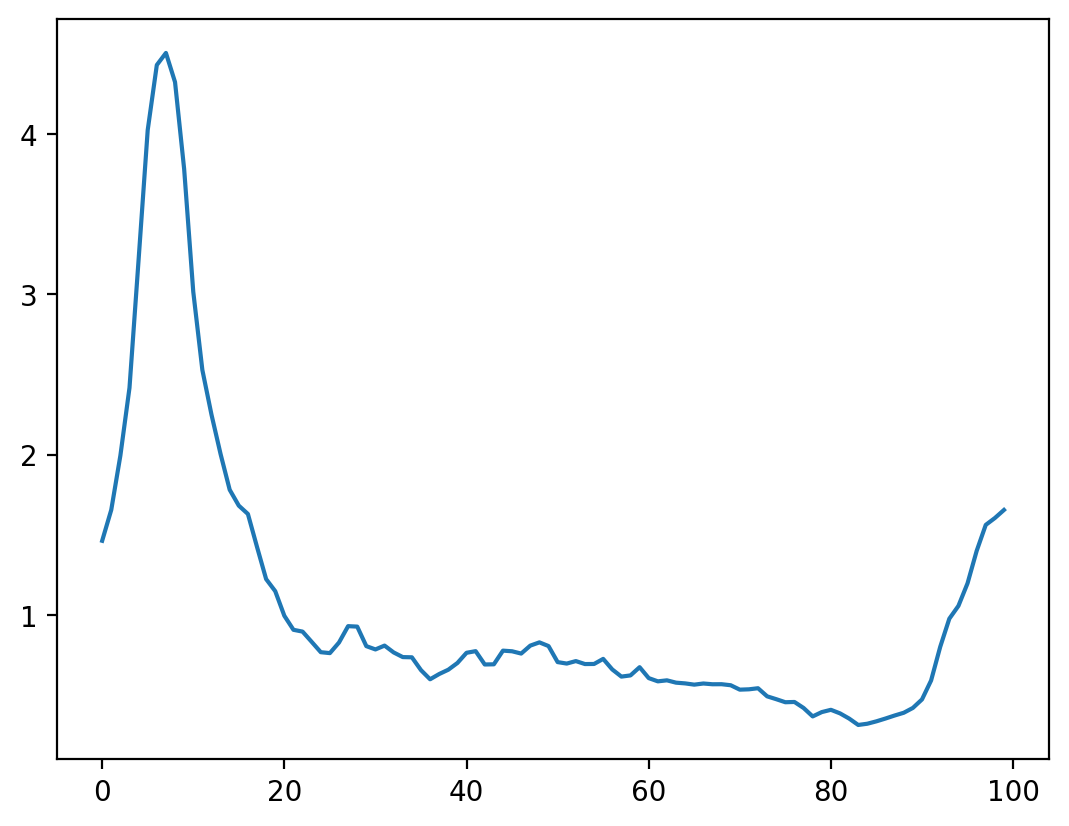

In [23]:
y=np.arange(100)
sample = []
for i in comp2:
    sample.append(odf_complex[i])

plt.figure(dpi=200)
plt.plot(y,np.mean(sample,axis=0))

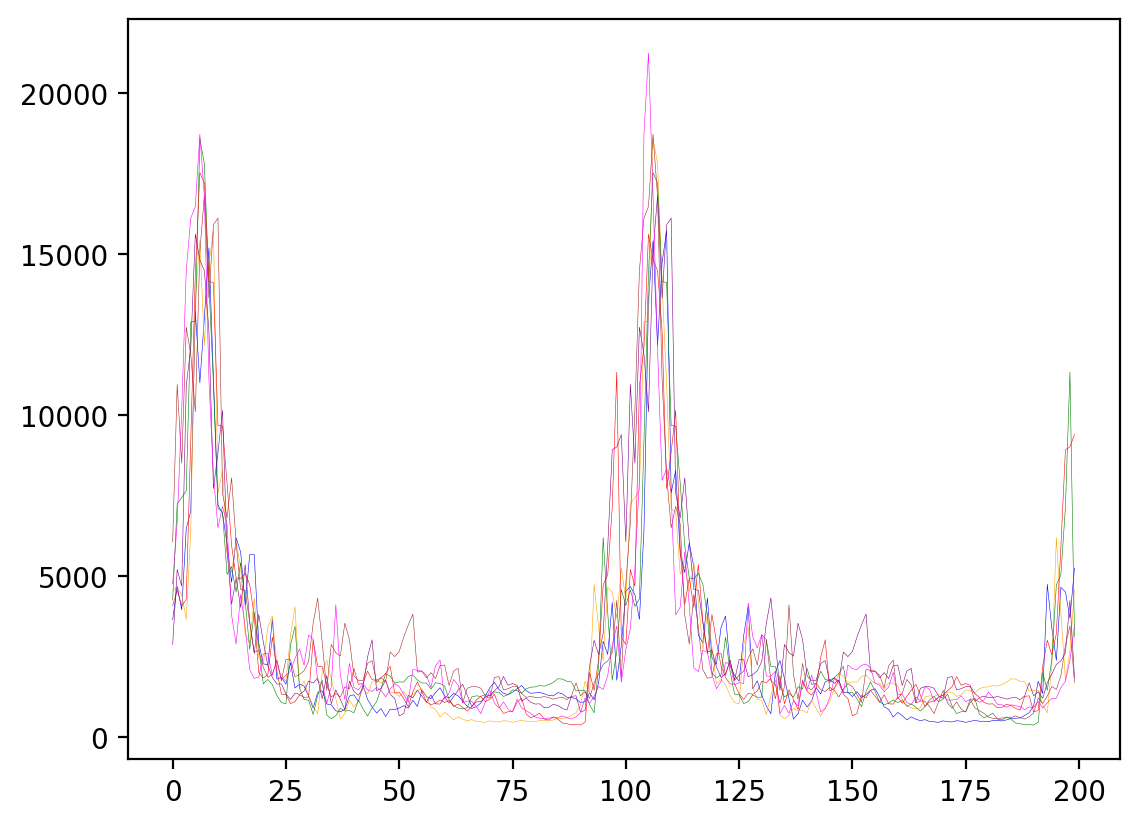

In [24]:
y=np.arange(200)
plt.figure(dpi=200)
l=0.2

plot = []

comp = comp2
len_comp = len(comp)
j = 0

for i in range(len_comp//2):
    plot.append([])
    plot[i].extend(odf_hfc[comp[j]])
    plot[i].extend(odf_hfc[comp[j+1]])
    j += 1
    plt.plot(y,plot[i],color=colors[i], linewidth=l)

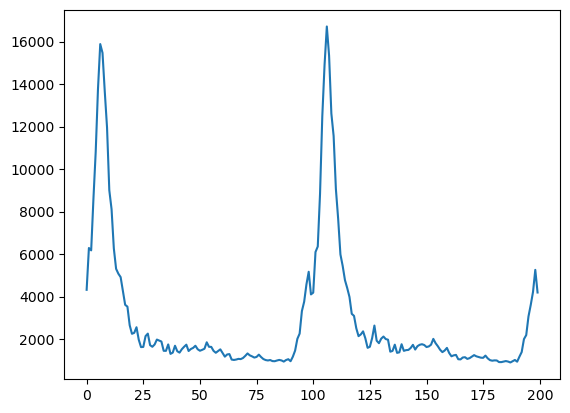

In [25]:
sample = []
for i in range(len(plot)):
    sample.append(plot[i])
plt.plot(y,np.mean(sample,axis=0))